In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2] , [1.5,1.8] , [5,8], [8,8], [1,0.6], [9,11]])

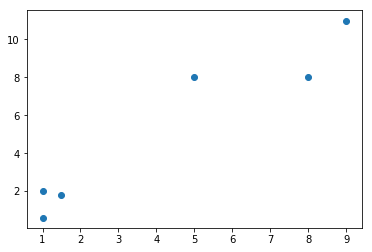

In [3]:
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [24]:
class K_Means:
    def __init__(self, k= 2, max_iter= 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, data):
        self.means = []
        # raodom initialise thr means first
        for i in range(self.k):
            self.means.append(data[i]) # appending first k points as our means

        for i in range(self.max_iter):
            # assign datapoints to cluster where they belong

            clusters = []
            for j in range(self.k):
                clusters.append([]) # create empty clusters

            for point in data: # adding points to the 'k' clusters
                distances = [((point - m)**2).sum() for m in self.means]  # find dist to all means
                min_dist = min(distances)   # find the MIN_dist
                l = distances.index(min_dist)  # find the mean where we got MIN_dist
                clusters[l].append(point)    # add this point to that mean's cluster


            # calculate new mean vals
            change = False #used just to limit ki kitni baar iteratn krni hai means ki
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis= 0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break


    
    def predict(self, test_data):
        predictions = []
        for point in test_data: # adding points to the 'k' clusters
            distances = [((point - m)**2).sum() for m in self.means]
            min_dist = min(distances)
            l = distances.index(min_dist)
            predictions.append(l)
        return predictions 

In [25]:
kmeans = K_Means(k= 2, max_iter= 150)

constructor


In [26]:
kmeans.fit(X)

In [29]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [30]:
kmeans.means

[array([ 1.16666667,  1.46666667]), array([ 7.33333333,  9.        ])]

## Class implementation of K_means working great!

## following are individual functions, where we havent packaged them in a single class

In [36]:
def fit(data, k= 2, max_iter= 100):
    means = []
    # raodom initialise thr means first
    for i in range(k):
        means.append(data[i]) # appending first k points as our means
        
    for i in range(max_iter):
        # assign datapoints to cluster where they belong
        
        clusters = []
        for j in range(k):
            clusters.append([]) # create empty clusters
            
        for point in data: # adding points to the 'k' clusters
            distances = [((point - m)**2).sum() for m in means]  # find dist to all means
            min_dist = min(distances)   # find the MIN_dist
            l = distances.index(min_dist)  # find the mean where we got MIN_dist
            clusters[l].append(point)    # add this point to that mean's cluster
            
            
        # calculate new mean vals
        change = False #used just to limit ki kitni baar iteratn krni hai means ki
        for j in range(k):
            new_mean = np.average(clusters[j], axis= 0)
            if not np.array_equal(means[j] , new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
                               
    return means

In [37]:
means = fit(X)

In [38]:
def predict(test_data, means):
    predictions = []
    for point in test_data: # adding points to the 'k' clusters
        distances = [((point - m)**2).sum() for m in means]
        min_dist = min(distances)
        l = distances.index(min_dist)
        predictions.append(l)
    return predictions      

In [39]:
predict(X, means)

[0, 0, 1, 1, 0, 1]

### We are getting the EXACT same predictions as we were getting from sklearn'ms implementation of KMeans